# Perzeptronfunktionen definieren

In [1]:
import numpy as np
from random import randint

# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x
    
f = np.vectorize(f)

def create_new_perceptron(nr_inputs, nr_outputs):
    low = -1
    high = +1
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W


def test_perceptron(W, x_test, y_test):
    
    nr_test_samples = x_test.shape[0]    
    correct = 0
    for test_sample_nr in range(0,nr_test_samples):
        
        # Berechnet den Output
        row_vec = x_test[test_sample_nr, :]
        x = np.append(row_vec,[1])
        out = predict(W,x)
        
        # Was wäre richtig gewesen?        
        one_hot_vec = y_test[test_sample_nr, :]
        gt_label = np.argmax( one_hot_vec )

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)
        if is_label == gt_label:
            correct += 1     
            
    print("Korrekt: {} von {}".format(correct,nr_test_samples))
    
    return correct/nr_test_samples
    

def train_perceptron(W,
                     x_train, y_train,
                     x_test, y_test,
                     nr_train_steps,
                     alpha):
    
    nr_outputs = y_train.shape[1]
    
    history = []
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Suche zufällige Zeile aus den
        # Trainingsdaten raus
        row_vec = x_train[rnd_img_nr, :]        
        x = np.append(row_vec,[1])        
        out = predict(W,x)
        
        # Was hätte rauskommen sollen?
        one_hot_vec = y_train[rnd_img_nr, :]
                                
        # Fehlerberechnung        
        error = one_hot_vec - out
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            correct_ratio = test_perceptron(W, x_test, y_test)
            history.append( correct_ratio )
            
    return history


def predict(W,x):
    act = np.matmul(x, W)
    out = f(act)
    return out
    

# Beispieldaten erzeugen

In [6]:
min_coord = -1.0
max_coord = +1.0
nr_train_samples = 1000
data_x = np.random.uniform(min_coord,max_coord, (nr_train_samples, 2))

In [7]:
data_x.shape

(1000, 2)

In [8]:
data_x[:10]

array([[-0.14072764, -0.90729067],
       [-0.07505489,  0.66324517],
       [ 0.34717597, -0.12856494],
       [ 0.8900043 ,  0.80019815],
       [ 0.02497551, -0.32641175],
       [ 0.32297551, -0.39640457],
       [ 0.85099362,  0.91117816],
       [-0.391454  ,  0.19970001],
       [ 0.19477868, -0.95859745],
       [ 0.67664648,  0.05527724]])

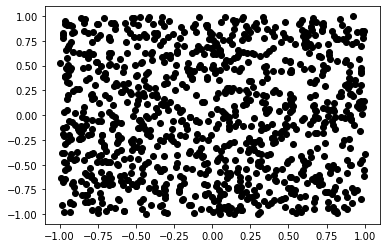

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], color="black")
plt.show()

In [10]:
# Left/Right
def gt_class1(point):
    if point[0]<0.0:
        return [1,0]
    else:
        return [0,1]

In [128]:
# Circle
import math

def gt_class2(point):
    x = point[0]
    y = point[1]
    dist = math.sqrt(x**2+y**2)
    if dist<0.5:
        return [1,0]
    else:
        return [0,1]

In [12]:
# Diagonal
import math

def gt_class3(point):
    x = point[0]
    y = point[1]
    if x*1.0+y*1.0<0.5:
        return [1,0]
    else:
        return [0,1]

Wählen Sie hier zwischen:

- gt_class1
- gt_class2
- gt_class3

um zu testen, wie gut das Perzeptron unterschiedliche Klassifikationsprobleme lösen kann.

In [129]:
gt_class = gt_class2

In [130]:
gt_class((-0.5,1.0))

[0, 1]

In [131]:
gt_class((-0.5,-1.0))

[0, 1]

In [132]:
gt_class((+0.1,-1.0))

[0, 1]

In [133]:
gt_class((+0.1,-.1))

[1, 0]

In [134]:
for p in data_x[:10]:
    print(p, gt_class(p))

[-0.58641179 -0.0998167 ] [0, 1]
[ 0.85472363 -0.33053028] [0, 1]
[ 0.75028278 -0.67184451] [0, 1]
[-0.291853    0.04206411] [1, 0]
[-0.66405362  0.49630731] [0, 1]
[-0.87266748 -0.53813299] [0, 1]
[0.59894158 0.25416795] [0, 1]
[ 0.72106764 -0.38659279] [0, 1]
[-0.71297306  0.23010481] [0, 1]
[ 0.97307813 -0.3770002 ] [0, 1]


In [135]:
data_y = [gt_class(p) for p in data_x]

In [136]:
data_y[:10]

[[0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1]]

In [137]:
data_y = np.array( [gt_class(p) for p in data_x ] )

In [138]:
type(data_y)

numpy.ndarray

In [139]:
data_y.shape

(10000, 2)

In [140]:
colors = [np.argmax(row) for row in data_y]

In [141]:
colors[:10]

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

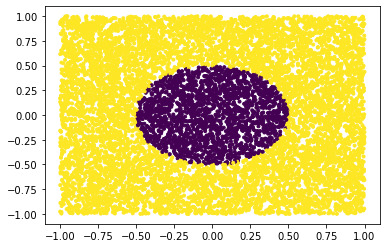

In [148]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], c=colors, marker=".")
plt.show()

In [149]:
def generate_example_data(how_much):
    min_coord = -1.0
    max_coord = +1.0
    data_x = np.random.uniform(min_coord,max_coord, (how_much, 2))
    data_y = np.array( [gt_class(p) for p in data_x ] )
    return data_x, data_y

# Trainings- und Testdaten erzeugen

In [150]:
data_x, data_y = generate_example_data(10000)

In [151]:
data_x.shape

(10000, 2)

In [152]:
data_y.shape

(10000, 2)

In [153]:
N = int(data_x.shape[0] * 0.8)

In [154]:
N

8000

In [155]:
x_train = data_x[:N]
y_train = data_y[:N]
x_test  = data_x[N:]
y_test  = data_y[N:]

In [156]:
x_train.shape

(8000, 2)

In [157]:
y_train.shape

(8000, 2)

In [158]:
x_test.shape

(2000, 2)

In [159]:
y_test.shape

(2000, 2)

# Netz aufbauen und trainieren

In [160]:
n_inputs = 2+1
n_outputs = 2
W = create_new_perceptron(n_inputs,n_outputs)

In [161]:
W.shape

(3, 2)

In [162]:
W

array([[ 0.62226762, -0.9542988 ],
       [-0.34864318,  0.79064181],
       [ 0.25981028,  0.41172466]])

In [163]:
test_perceptron(W, x_test, y_test)

Korrekt: 934 von 2000


0.467

In [164]:
alpha = 0.01
nr_train_steps = 1000
history = train_perceptron(W,
                           x_train, y_train,
                           x_test, y_test,
                           nr_train_steps,
                           alpha)


Train step:  0
Korrekt: 933 von 2000

Train step:  100
Korrekt: 1028 von 2000

Train step:  200
Korrekt: 1244 von 2000

Train step:  300
Korrekt: 1365 von 2000

Train step:  400
Korrekt: 1413 von 2000

Train step:  500
Korrekt: 1524 von 2000

Train step:  600
Korrekt: 1613 von 2000

Train step:  700
Korrekt: 1616 von 2000

Train step:  800
Korrekt: 1616 von 2000

Train step:  900
Korrekt: 1616 von 2000


# Netz testen

In [165]:
x_test.shape

(2000, 2)

In [166]:
x_test[:5]

array([[ 0.77329569, -0.21345084],
       [ 0.1418077 ,  0.76586608],
       [-0.66600505,  0.54387606],
       [-0.68737643,  0.47778511],
       [ 0.97857925,  0.91177913]])

In [167]:
y_test.shape

(2000, 2)

In [168]:
y_test[:5]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

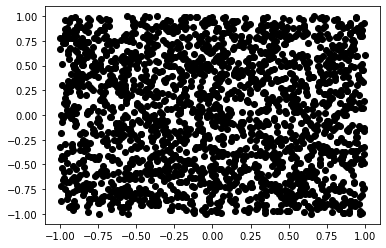

In [169]:
plt.scatter(x_test[:,0], x_test[:,1], color="black")
plt.show()

In [170]:
all_outputs = []
for row_vec in x_test:
    x = np.append(row_vec,[1])
    out = predict(W,x)
    all_outputs.append( out )

In [171]:
all_outputs[:10]

[array([0.20780067, 0.75601087]),
 array([0.15389249, 0.86257496]),
 array([0.12542027, 0.91211166]),
 array([0.12632026, 0.90987865]),
 array([0.18569251, 0.80631738]),
 array([0.16339254, 0.83440657]),
 array([0.16960402, 0.83548   ]),
 array([0.16673972, 0.8397354 ]),
 array([0.21453749, 0.73842546]),
 array([0.18449015, 0.7917453 ])]

In [172]:
colors = [np.argmax(outarray) for outarray in all_outputs]

In [173]:
colors[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

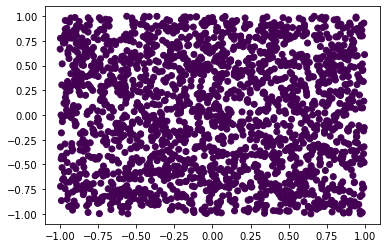

In [174]:
plt.scatter(x_test[:,0], x_test[:,1], c=colors)
plt.show()